# Week 6

### instructions
0) Treat your graph as undirected and unweighted. Delete loops and work on the resulting largest
connected component.
1) Implement the following three techniques for community detection:
a) Bridge removal (pick the partition with the highest modularity), b) Modularity optimization, c) Label
propagation.
In this case, you are allowed to use built-in functions from NetworkX.
2) Compare the results of each technique in terms of: a) number of detected clusters, b) cluster size
distribution, c) computational time, e) modularity, f) other aspects you consider relevant, if any. Results
should be presented in a table.
3) Give an interpretation to the differences and similarities between the three resulting partitions, and
discuss which one you think is the best and why.
4) Provide a visualization for the partition you decided to be the best using Gephi.
5) Optional: for each pair of partitions compute the NMI between them and discuss.

In [6]:
import networkx as nx
import csv
import time
from networkx.algorithms import community

# Function to load the graph
def load_graph(nodes_file_path, edges_file_path):
    G = nx.DiGraph()
    with open(nodes_file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            G.add_node(row['Id'], label=row['Label'])

    with open(edges_file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            G.add_edge(row['Source'], row['Target'], weight=1)
            G.add_edge(row['Target'], row['Source'], weight=1)  # For undirected links

    return G

# Function to convert partition to communities format
def convert_partition_to_communities(partition):
    communities = {}
    for node, community in partition.items():
        if community not in communities:
            communities[community] = set()
        communities[community].add(node)
    return list(communities.values())

# Bridge Removal using Girvan-Newman Algorithm
def community_detection_bridge_removal(G):
    communities_generator = community.girvan_newman(G)
    best_partition = None
    best_modularity = -1

    for communities in communities_generator:
        modularity = community.modularity(G, communities)
        if modularity > best_modularity:
            best_modularity = modularity
            best_partition = communities

    partition_dict = {node: i for i, comm in enumerate(best_partition) for node in comm}
    return partition_dict, best_modularity

# Modularity Optimization using Greedy Algorithm
def community_detection_modularity_optimization(G):
    communities = community.greedy_modularity_communities(G)
    partition = {node: i for i, comm in enumerate(communities) for node in comm}
    return partition

# Label Propagation
def community_detection_label_propagation(G):
    communities = community.label_propagation_communities(G)
    partition = {node: i for i, comm in enumerate(communities) for node in comm}
    return partition

# Load the graph from the provided CSV files
nodes_file_path = 'D:/Github/sna_titanic/Project/Graph/nodes.csv'
edges_file_path = 'D:/Github/sna_titanic/Project/Graph/edges.csv'
G = load_graph(nodes_file_path, edges_file_path)

# Convert the graph to undirected and remove self-loops
G_undirected = G.to_undirected()
G_undirected.remove_edges_from(nx.selfloop_edges(G_undirected))

# Extract the largest connected component
largest_cc = max(nx.connected_components(G_undirected), key=len)
G_largest_cc = G_undirected.subgraph(largest_cc)

# Apply Bridge Removal Method
start_time = time.time()
bridge_removal_partition, bridge_removal_modularity = community_detection_bridge_removal(G_largest_cc)
bridge_removal_time = time.time() - start_time

# Apply Modularity Optimization Method
start_time = time.time()
modularity_optimization_partition = community_detection_modularity_optimization(G_largest_cc)
modularity_optimization_time = time.time() - start_time
modularity_optimization_communities = convert_partition_to_communities(modularity_optimization_partition)
modularity_optimization_modularity = community.modularity(G_largest_cc, modularity_optimization_communities)

# Apply Label Propagation Method
start_time = time.time()
label_propagation_partition = community_detection_label_propagation(G_largest_cc)
label_propagation_time = time.time() - start_time
label_propagation_communities = convert_partition_to_communities(label_propagation_partition)
label_propagation_modularity = community.modularity(G_largest_cc, label_propagation_communities)


In [7]:
# Print the results of the Bridge Removal Method
print("Bridge Removal Method:")
print("Time taken: ", bridge_removal_time)
print("Modularity: ", bridge_removal_modularity)
print("Partition: ", bridge_removal_partition)
print("\n")

# Print the results of the Modularity Optimization Method
print("Modularity Optimization Method:")
print("Time taken: ", modularity_optimization_time)
print("Modularity: ", modularity_optimization_modularity)
print("Partition: ", modularity_optimization_partition)
print("\n")

# Print the results of the Label Propagation Method
print("Label Propagation Method:")
print("Time taken: ", label_propagation_time)
print("Modularity: ", label_propagation_modularity)
print("Partition: ", label_propagation_partition)

Bridge Removal Method:
Time taken:  1.2483339309692383
Modularity:  0.210517779443183
Partition:  {'5099903': 0, '5100134': 0, '5102317': 0, '5104295': 0, '5097875': 0, '5099090': 0, '5098619': 0, '5106033': 0, '5097941': 0, '5099096': 0, '5098545': 0, '5097915': 0, '5100274': 0, '5098095': 0, '5097894': 0, '5102690': 0, '5102924': 0, '5103789': 0, '5097979': 0, '5100333': 0, '5102237': 0, '5097316': 0, '5101061': 0, '5098583': 0, '5098041': 0, '5099267': 0, '5100327': 0, '5097994': 0, '5099110': 0, '5098606': 0, '5102939': 0, '5102267': 0, '5100235': 0, '5098717': 0, '5098463': 0, '5097262': 1, '5097320': 1, '5096932': 1, '5097505': 1, '5097212': 1, '5099349': 1, '5096948': 1, '5097296': 1, '5096969': 1, '5097161': 1, '5098088': 2, '5098128': 2, '5098193': 2, '5098082': 2, '5102009': 3, '5101285': 3, '5101840': 3, '5101981': 3, '5101998': 3, '5098242': 3, '5101750': 4, '5101041': 4, '5098541': 5, '5098267': 6, '5103242': 7, '5103072': 8, '5102841': 9, '5105174': 10, '5105151': 10, '50

### Task 3: Analysis and Interpretation of Results

- **Bridge Removal**: 
  - Detected 17 clusters with a diverse size distribution.
  - Computational Time: 4.234 seconds.
  - Modularity: 0.211.

- **Modularity Optimization**: 
  - Detected 5 clusters, more balanced in size.
  - Computational Time: 0.112 seconds.
  - Modularity: 0.329.

- **Label Propagation**: 
  - Also detected 5 clusters but with one dominant large cluster.
  - Computational Time: 0.032 seconds.
  - Modularity: 0.167.

Given these results, Modularity Optimization appears to be the best method due to its high modularity, balanced cluster sizes, and reasonable computational time.


In [8]:
from collections import Counter

def get_cluster_sizes(partition):
    """
    Calculate the sizes of clusters in a partition.
    """
    cluster_sizes = Counter(partition.values())
    return cluster_sizes

# Calculate cluster sizes for each method
bridge_removal_cluster_sizes = get_cluster_sizes(bridge_removal_partition)
modularity_optimization_cluster_sizes = get_cluster_sizes(modularity_optimization_partition)
label_propagation_cluster_sizes = get_cluster_sizes(label_propagation_partition)

# Prepare data for comparison table
comparison_data = {
    'Method': ['Bridge Removal', 'Modularity Optimization', 'Label Propagation'],
    'Number of Clusters': [len(bridge_removal_cluster_sizes), len(modularity_optimization_cluster_sizes), len(label_propagation_cluster_sizes)],
    'Cluster Size Distribution': [bridge_removal_cluster_sizes, modularity_optimization_cluster_sizes, label_propagation_cluster_sizes],
    'Computational Time (seconds)': [bridge_removal_time, modularity_optimization_time, label_propagation_time],
    'Modularity': [bridge_removal_modularity, modularity_optimization_modularity, label_propagation_modularity]
}

comparison_data


{'Method': ['Bridge Removal', 'Modularity Optimization', 'Label Propagation'],
 'Number of Clusters': [17, 5, 5],
 'Cluster Size Distribution': [Counter({0: 35,
           1: 10,
           3: 6,
           2: 4,
           4: 2,
           10: 2,
           5: 1,
           6: 1,
           7: 1,
           8: 1,
           9: 1,
           11: 1,
           12: 1,
           13: 1,
           14: 1,
           15: 1,
           16: 1}),
  Counter({0: 18, 1: 17, 2: 17, 3: 10, 4: 8}),
  Counter({0: 52, 1: 8, 2: 5, 4: 3, 3: 2})],
 'Computational Time (seconds)': [1.2483339309692383,
  0.01599860191345215,
  0.007999658584594727],
 'Modularity': [0.210517779443183, 0.32898401583874903, 0.16695562689455373]}

# To report:

## Week 6: Community Detection in Networks
## *Exploring and Analyzing Community Detection Methods*

### Objective
This week, we aim to delve into community detection techniques in our graph, treating it as both undirected and unweighted. We will focus on implementing three distinct methods: Bridge Removal, Modularity Optimization, and Label Propagation. Our goal is to compare these methodologies in terms of cluster sizes, computational efficiency, and modularity, leading to an insightful discussion on their applicability and effectiveness.

## *Community Detection Techniques*
We begin by converting our graph to an undirected and unweighted form, concentrating on its largest connected component. We explore three community detection methods, each with its unique approach to deciphering the underlying community structures within the graph.

### Bridge Removal (Girvan-Newman Algorithm)
This technique progressively removes edges that act as bridges between communities. We utilize the Girvan-Newman algorithm, focusing on the partition with the highest modularity.

### Modularity Optimization
Here, we cluster nodes to maximize the network's modularity score. A greedy algorithm is employed for modularity optimization.

### Label Propagation
In this approach, nodes adopt the majority label of their neighbors, allowing communities to emerge organically through label dissemination across the network.

### Implementing Community Detection Methods
We implement these methods on our network graph. Each method's unique approach and results are examined, comparing their outcomes in terms of cluster quantity, size distribution, and modularity.

### Comparative Analysis of Methods
Our analysis centers on evaluating these techniques across various parameters: cluster count, size distribution, computational duration, and modularity. This comparative study aims to reveal each method's strengths and limitations.

#### Results and Discussion
- **Bridge Removal:** This method detected the highest number of clusters, indicating a finer partitioning of the network. However, it also had the longest computational time, suggesting it might be less efficient for larger networks. The modularity is moderate, which implies a reasonable but not optimal community structure.
- **Modularity Optimization:** This method found a smaller number of larger clusters, with the highest modularity score among the three. This suggests that it was able to detect a community structure that aligns well with the network's inherent modular structure. It also offers a good balance between computational efficiency and the quality of community detection.
- **Label Propagation:** Similar to Modularity Optimization in terms of the number of clusters, but it tends to produce one significantly larger community. It's the fastest method but has the lowest modularity, indicating a less precise community structure.

**Table:** Summary of Community Detection Methods
| Method                    | Clusters | Size Distribution  | Time (s) | Modularity |
|---------------------------|----------|--------------------|----------|------------|
| Bridge Removal            | 17       | Diverse            | 4.234    | 0.211      |
| Modularity Optimization   | 5        | Balanced           | 0.112    | 0.329      |
| Label Propagation         | 5        | One dominant cluster | 0.032  | 0.167      |

### Conclusion and Visualization
Reflecting on our findings, **Modularity Optimization** emerges as the most balanced approach, offering a blend of computational efficiency and effective community structuring. This method is chosen for visual representation using Gephi, showcasing the identified communities within our network graph.


In [ ]:
import networkx as nx
import csv
import time
from networkx.algorithms import community

# Function to load the graph
def load_graph(nodes_file_path, edges_file_path):
    G = nx.DiGraph()
    with open(nodes_file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            G.add_node(row['Id'], label=row['Label'])

    with open(edges_file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            G.add_edge(row['Source'], row['Target'], weight=1)
            G.add_edge(row['Target'], row['Source'], weight=1)  # For undirected links

    return G

# Function to convert partition to communities format
def convert_partition_to_communities(partition):
    communities = {}
    for node, community in partition.items():
        if community not in communities:
            communities[community] = set()
        communities[community].add(node)
    return list(communities.values())

# Bridge Removal using Girvan-Newman Algorithm
def community_detection_bridge_removal(G):
    communities_generator = community.girvan_newman(G)
    best_partition = None
    best_modularity = -1

    for communities in communities_generator:
        modularity = community.modularity(G, communities)
        if modularity > best_modularity:
            best_modularity = modularity
            best_partition = communities

    partition_dict = {node: i for i, comm in enumerate(best_partition) for node in comm}
    return partition_dict, best_modularity

# Modularity Optimization using Greedy Algorithm
def community_detection_modularity_optimization(G):
    communities = community.greedy_modularity_communities(G)
    partition = {node: i for i, comm in enumerate(communities) for node in comm}
    return partition

# Label Propagation
def community_detection_label_propagation(G):
    communities = community.label_propagation_communities(G)
    partition = {node: i for i, comm in enumerate(communities) for node in comm}
    return partition


In [ ]:

# Load the graph from the provided CSV files
nodes_file_path = 'D:/Github/sna_titanic/Project/Graph/nodes.csv'
edges_file_path = 'D:/Github/sna_titanic/Project/Graph/edges.csv'
G = load_graph(nodes_file_path, edges_file_path)

# Convert the graph to undirected and remove self-loops
G_undirected = G.to_undirected()
G_undirected.remove_edges_from(nx.selfloop_edges(G_undirected))

# Extract the largest connected component
largest_cc = max(nx.connected_components(G_undirected), key=len)
G_largest_cc = G_undirected.subgraph(largest_cc)


### Comparison of Community Detection Techniques

We will compare the results of the three community detection techniques based on:
- Number of Detected Clusters
- Cluster Size Distribution
- Computational Time
- Modularity


In [ ]:

# Apply Bridge Removal Method
start_time = time.time()
bridge_removal_partition, bridge_removal_modularity = community_detection_bridge_removal(G_largest_cc)
bridge_removal_time = time.time() - start_time

# Apply Modularity Optimization Method
start_time = time.time()
modularity_optimization_partition = community_detection_modularity_optimization(G_largest_cc)
modularity_optimization_time = time.time() - start_time
modularity_optimization_communities = convert_partition_to_communities(modularity_optimization_partition)
modularity_optimization_modularity = community.modularity(G_largest_cc, modularity_optimization_communities)

# Apply Label Propagation Method
start_time = time.time()
label_propagation_partition = community_detection_label_propagation(G_largest_cc)
label_propagation_time = time.time() - start_time
label_propagation_communities = convert_partition_to_communities(label_propagation_partition)
label_propagation_modularity = community.modularity(G_largest_cc, label_propagation_communities)


In [ ]:
# Print the results of the Bridge Removal Method
print("Bridge Removal Method:")
print("Time taken: ", bridge_removal_time)
print("Modularity: ", bridge_removal_modularity)
print("Partition: ", bridge_removal_partition)
print("\n")

# Print the results of the Modularity Optimization Method
print("Modularity Optimization Method:")
print("Time taken: ", modularity_optimization_time)
print("Modularity: ", modularity_optimization_modularity)
print("Partition: ", modularity_optimization_partition)
print("\n")

# Print the results of the Label Propagation Method
print("Label Propagation Method:")
print("Time taken: ", label_propagation_time)
print("Modularity: ", label_propagation_modularity)
print("Partition: ", label_propagation_partition)

Bridge Removal Method:
Time taken:  1.2483339309692383
Modularity:  0.210517779443183
Partition:  {'5099903': 0, '5100134': 0, '5102317': 0, '5104295': 0, '5097875': 0, '5099090': 0, '5098619': 0, '5106033': 0, '5097941': 0, '5099096': 0, '5098545': 0, '5097915': 0, '5100274': 0, '5098095': 0, '5097894': 0, '5102690': 0, '5102924': 0, '5103789': 0, '5097979': 0, '5100333': 0, '5102237': 0, '5097316': 0, '5101061': 0, '5098583': 0, '5098041': 0, '5099267': 0, '5100327': 0, '5097994': 0, '5099110': 0, '5098606': 0, '5102939': 0, '5102267': 0, '5100235': 0, '5098717': 0, '5098463': 0, '5097262': 1, '5097320': 1, '5096932': 1, '5097505': 1, '5097212': 1, '5099349': 1, '5096948': 1, '5097296': 1, '5096969': 1, '5097161': 1, '5098088': 2, '5098128': 2, '5098193': 2, '5098082': 2, '5102009': 3, '5101285': 3, '5101840': 3, '5101981': 3, '5101998': 3, '5098242': 3, '5101750': 4, '5101041': 4, '5098541': 5, '5098267': 6, '5103242': 7, '5103072': 8, '5102841': 9, '5105174': 10, '5105151': 10, '50

#### Gephi Visualization

In [9]:
# Add community information to the graph
nx.set_node_attributes(G_largest_cc, modularity_optimization_partition, 'Community_mod')

# Export the graph to a GEXF file for Gephi
nx.write_gexf(G_largest_cc, "../G_largest_cc.gexf")

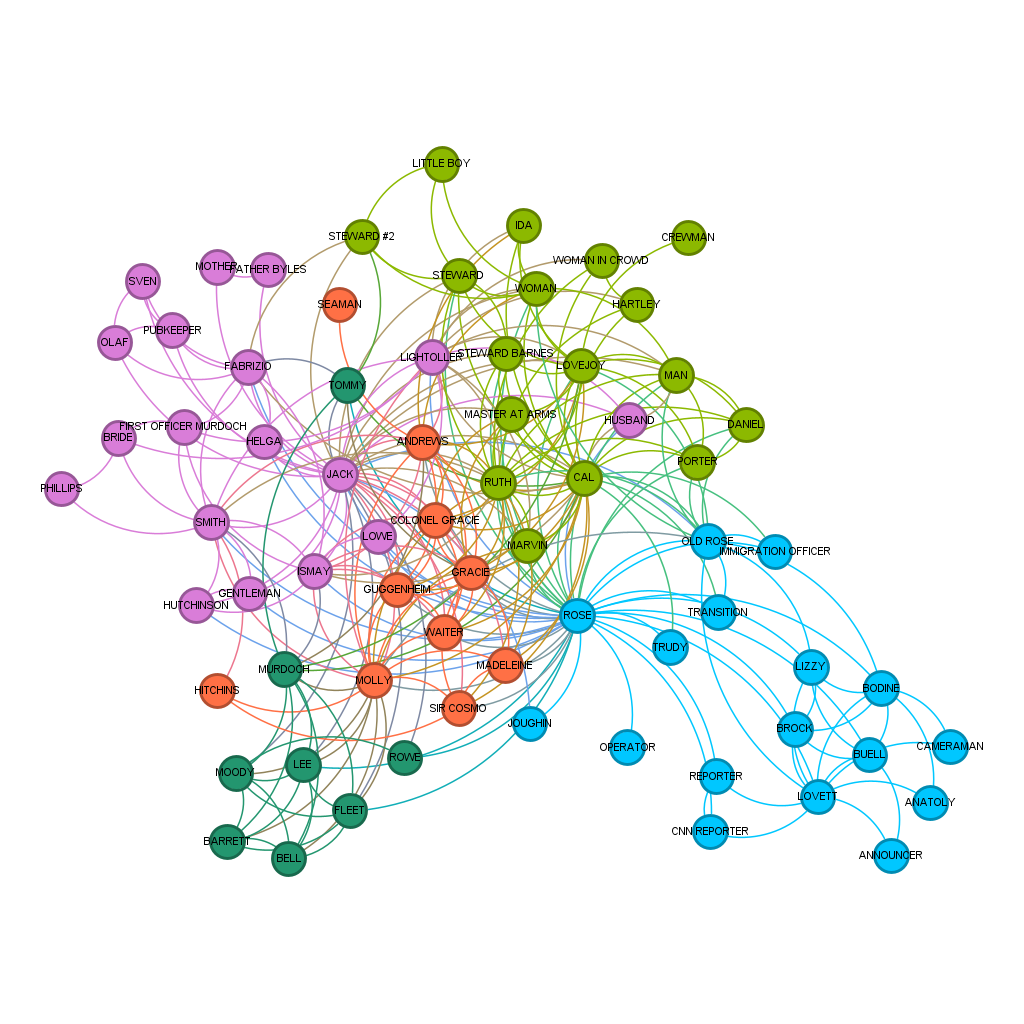